# 딥러닝 LSTM (금 가격으로만 예측하기)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

Using TensorFlow backend.


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pickle

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/gold/data')

In [0]:
gold=pickle.load(open('gold_price.pkl','rb'))

In [9]:
gold.columns

Index(['USD/T.oz', 'index_price', 'index_volume', 'index_change', 'cny/krw',
       'usd/krw', '100jpy/krw', 'eur/krw', 'gbp/krw', 'nasdaq_volume',
       'kospi_volume', 'dow_volume', 'snp500_volume', 'WTI_barrel', 'nasdaq',
       'kospi', 'dow', 'snp500'],
      dtype='object')

# 전처리

In [0]:
mid_prices = gold['USD/T.oz'].values

In [0]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [0]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((5129, 50, 1), (570, 50, 1))

In [0]:
# def min_max_scaling(x):
#     x_np = np.asarray(x)
#     return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7)

In [0]:
# min_max_scaling(result)
# result = np.array(result)

In [0]:
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((5129, 50, 1), (570, 50, 1))

# 단순 LSTM

In [0]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 5129 samples, validate on 570 samples
Epoch 1/20
5129/5129 [==============================] - 108s 21ms/step - loss: 3.1022e-04 - val_loss: 1.1392e-04
Epoch 2/20
5129/5129 [==============================] - 105s 20ms/step - loss: 1.4214e-04 - val_loss: 5.2215e-05
Epoch 3/20
5129/5129 [==============================] - 103s 20ms/step - loss: 1.3103e-04 - val_loss: 3.3383e-05
Epoch 4/20
5129/5129 [==============================] - 105s 20ms/step - loss: 1.2731e-04 - val_loss: 3.9366e-05
Epoch 5/20
5129/5129 [==============================] - 106s 21ms/step - loss: 1.2562e-04 - val_loss: 3.9827e-05
Epoch 6/20
5129/5129 [==============================] - 106s 21ms/step - loss: 1.2412e-04 - val_loss: 3.0230e-05
Epoch 7/20
5129/5129 [==============================] - 105s 21ms/step - loss: 1.2109e-04 - val_loss: 3.7356e-05
Epoch 8/20
5129/5129 [==============================] - 105s 20ms/step - loss: 1.2218e-04 - val_loss: 3.4175e-05
Epoch 9/20
5129/5129 [===========================

In [0]:
def prediction(model):
  pred = model.predict(x_test)
  fig = plt.figure(facecolor='white', figsize=(20, 10))
  ax = fig.add_subplot(111)
  ax.plot(y_test, label='True')
  ax.plot(pred, label='Prediction')
  ax.legend()
  plt.title('Normalization price')
  plt.show()
 
  LSTM5_1 = pred.mean() - y_test.mean()
  
  print('\n',LSTM5_1,'\n')
  
  trainScore = model.evaluate(x_train, y_train, verbose=0)
  model.reset_states()
  print('Train Score: ', trainScore)
  testScore = model.evaluate(x_test, y_test, verbose=0)
  model.reset_states()
  print('Test Score: ', testScore)


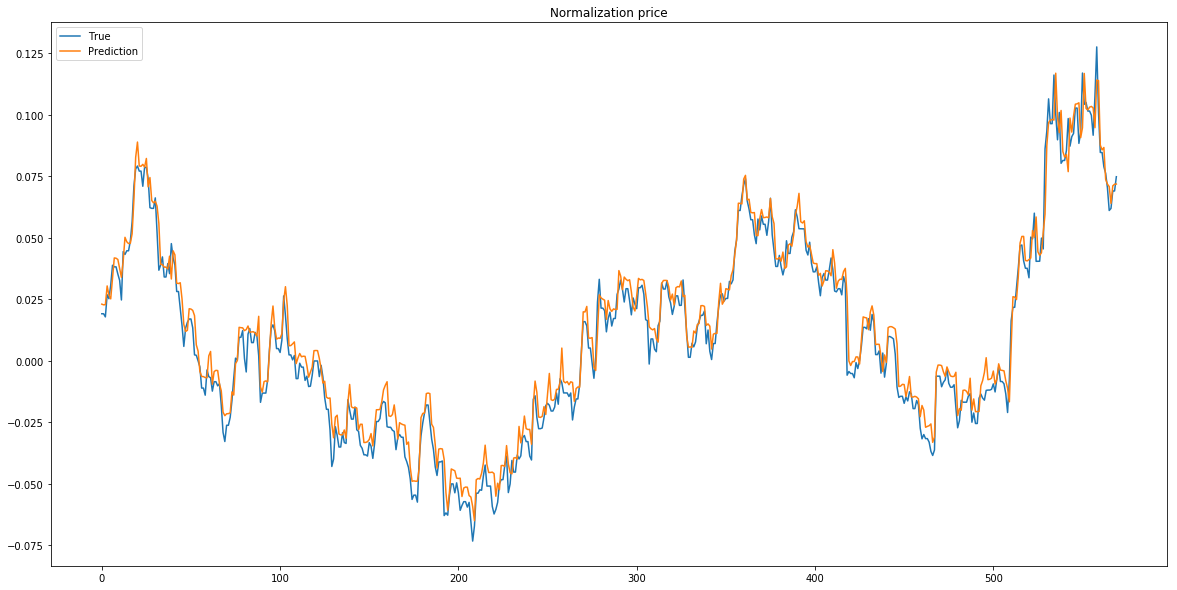


 0.0038896648737245035 

Train Score:  0.00011535769568740482
Test Score:  4.64549596041539e-05


In [0]:
prediction(model)

In [0]:
pred = model.predict(x_test)

Test Score:  393674.6041666667


# conv1D +lstm *2

In [0]:
model = Sequential()


model.add(layers.Conv1D(50, 5, activation='relu',input_shape=(50, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 46, 50)            300       
_________________________________________________________________
lstm_11 (LSTM)               (None, 46, 50)            20200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 81,001
Trainable params: 81,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 5129 samples, validate on 570 samples
Epoch 1/20
5129/5129 [==============================] - 103s 20ms/step - loss: 3.9622e-04 - val_loss: 5.3330e-05
Epoch 2/20
5129/5129 [==============================] - 99s 19ms/step - loss: 1.6242e-04 - val_loss: 3.4113e-05
Epoch 3/20
5129/5129 [==============================] - 99s 19ms/step - loss: 1.4707e-04 - val_loss: 3.4012e-05
Epoch 4/20
5129/5129 [==============================] - 99s 19ms/step - loss: 1.4202e-04 - val_loss: 3.3745e-05
Epoch 5/20
5129/5129 [==============================] - 98s 19ms/step - loss: 1.3421e-04 - val_loss: 3.1406e-05
Epoch 6/20
5129/5129 [==============================] - 98s 19ms/step - loss: 1.2920e-04 - val_loss: 3.9780e-05
Epoch 7/20
5129/5129 [==============================] - 98s 19ms/step - loss: 1.2509e-04 - val_loss: 6.6964e-05
Epoch 8/20
5129/5129 [==============================] - 98s 19ms/step - loss: 1.2497e-04 - val_loss: 5.8967e-05
Epoch 9/20
5129/5129 [==============================] - 

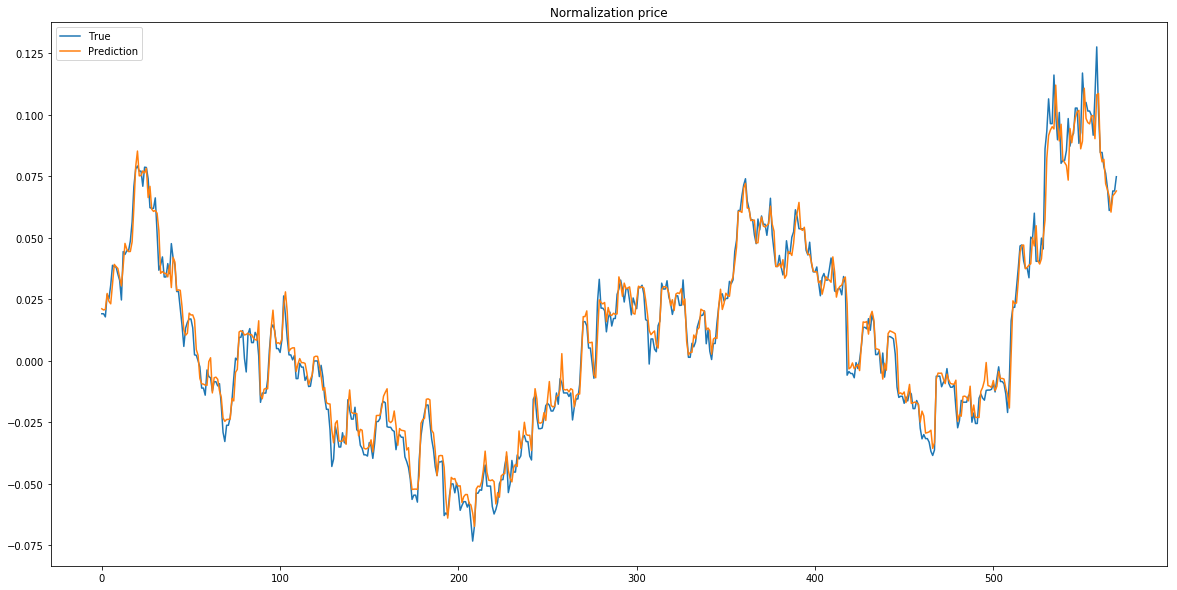


 0.0011291213857584428 

Train Score:  0.00010374874628344477
Test Score:  3.3748536518766754e-05


In [0]:
prediction(model)

Train Score:  0.00539755271867551


Test Score:  0.005423511051687232


# conv conv

In [0]:
model = Sequential()


model.add(layers.Conv1D(50, 5, activation='relu',input_shape=(50, 1)))
model.add(layers.Conv1D(50, 5, activation='relu'))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 46, 50)            300       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 42, 50)            12550     
_________________________________________________________________
lstm_17 (LSTM)               (None, 42, 50)            20200     
_________________________________________________________________
lstm_18 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 93,551
Trainable params: 93,551
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 5129 samples, validate on 570 samples
Epoch 1/20
5129/5129 [==============================] - 96s 19ms/step - loss: 5.1063e-04 - val_loss: 7.6388e-05
Epoch 2/20
5129/5129 [==============================] - 93s 18ms/step - loss: 1.9824e-04 - val_loss: 1.1403e-04
Epoch 3/20
5129/5129 [==============================] - 93s 18ms/step - loss: 1.6566e-04 - val_loss: 5.7248e-05
Epoch 4/20
5129/5129 [==============================] - 93s 18ms/step - loss: 1.5489e-04 - val_loss: 4.0572e-05
Epoch 5/20
5129/5129 [==============================] - 93s 18ms/step - loss: 1.4898e-04 - val_loss: 3.2991e-05
Epoch 6/20
5129/5129 [==============================] - 92s 18ms/step - loss: 1.4033e-04 - val_loss: 3.2214e-05
Epoch 7/20
5129/5129 [==============================] - 91s 18ms/step - loss: 1.3776e-04 - val_loss: 3.9013e-05
Epoch 8/20
5129/5129 [==============================] - 94s 18ms/step - loss: 1.3585e-04 - val_loss: 8.4561e-05
Epoch 9/20
5129/5129 [==============================] - 9

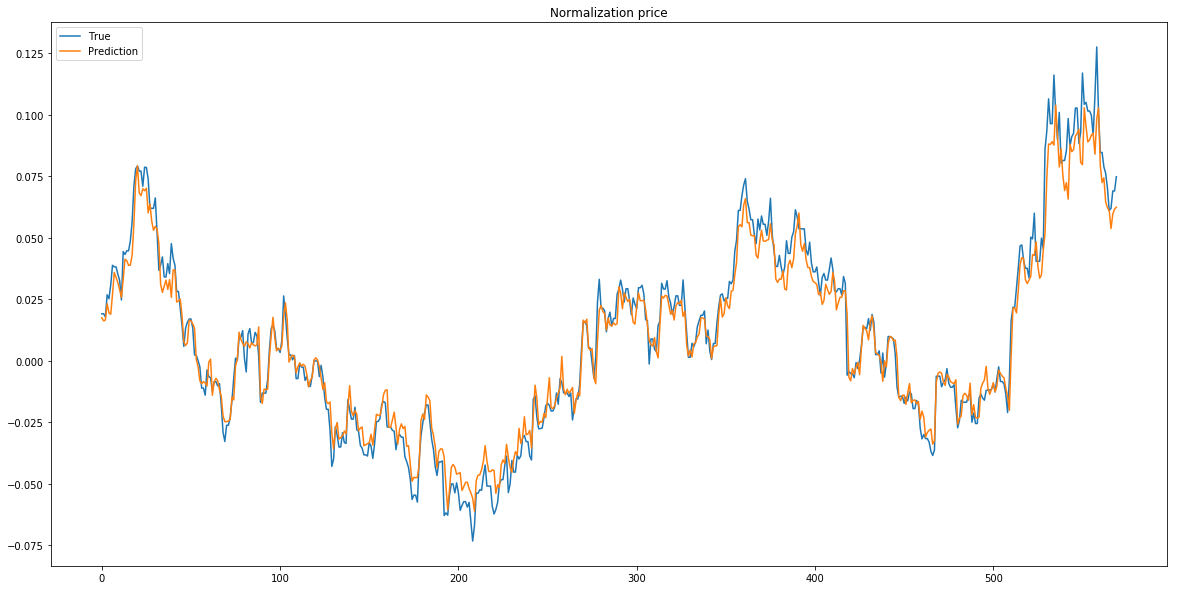


 -0.0009602803212947417 

Train Score:  0.0001489380806277971
Test Score:  5.390281281474847e-05


In [0]:
prediction(model)

In [0]:
pred = model.predict(x_test)

In [0]:
(0.0624555275+1)*result[0]

array([ 0.        ,  0.00260153,  0.00321365,  0.01910591,  0.01910591,
        0.01910591,  0.0257092 ,  0.00489699, -0.00103296,  0.00171395,
        0.00195114,  0.00195114,  0.00195114,  0.01273983,  0.00187463,
       -0.00394055, -0.00957209, -0.00221895, -0.00221895, -0.00221895,
       -0.00095644,  0.00045909, -0.00286933, -0.00286933, -0.00394055,
       -0.00394055, -0.00394055,  0.0007269 ,  0.0128546 ,  0.01951144,
        0.0148287 ,  0.02295464,  0.02295464,  0.02295464,  0.01530309,
       -0.00508828, -0.00899057, -0.01637431, -0.01218891, -0.01218891,
       -0.01218891, -0.00670275, -0.00263978, -0.00506532, -0.01479044,
       -0.02020774, -0.02020774, -0.02020774, -0.01614476, -0.01228073,
       -0.01765212])

In [0]:
result[0]

array([ 0.        ,  0.0024486 ,  0.00302474,  0.01798279,  0.01798279,
        0.01798279,  0.0241979 ,  0.00460912, -0.00097224,  0.00161319,
        0.00183645,  0.00183645,  0.00183645,  0.01199093,  0.00176443,
       -0.0037089 , -0.0090094 , -0.00208851, -0.00208851, -0.00208851,
       -0.00090022,  0.00043211, -0.00270066, -0.00270066, -0.0037089 ,
       -0.0037089 , -0.0037089 ,  0.00068417,  0.01209895,  0.01836448,
        0.01395701,  0.02160527,  0.02160527,  0.02160527,  0.01440351,
       -0.00478917, -0.00846206, -0.01541176, -0.0114724 , -0.0114724 ,
       -0.0114724 , -0.00630874, -0.00248461, -0.00476756, -0.013921  ,
       -0.01901984, -0.01901984, -0.01901984, -0.01519571, -0.01155882,
       -0.01661445])

Train Score:  4.577750334301264e-06


Test Score:  1.324793501816314e-06


# conv1d*3 + lstm*2

In [0]:
model = Sequential()


model.add(layers.Conv1D(50, 5, activation='relu',input_shape=(50, 1)))
model.add(layers.Conv1D(50, 5, activation='relu'))
model.add(layers.Conv1D(50, 5, activation='relu'))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 46, 50)            300       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 42, 50)            12550     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 38, 50)            12550     
_________________________________________________________________
lstm_15 (LSTM)               (None, 38, 50)            20200     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 106,101
Trainable params: 106,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 5129 samples, validate on 570 samples
Epoch 1/20
5129/5129 [==============================] - 86s 17ms/step - loss: 6.0514e-04 - val_loss: 8.9387e-05
Epoch 2/20
5129/5129 [==============================] - 84s 16ms/step - loss: 2.3345e-04 - val_loss: 9.7113e-05
Epoch 3/20
5129/5129 [==============================] - 84s 16ms/step - loss: 1.8937e-04 - val_loss: 5.5824e-05
Epoch 4/20
5129/5129 [==============================] - 84s 16ms/step - loss: 1.7819e-04 - val_loss: 3.4139e-05
Epoch 5/20
5129/5129 [==============================] - 83s 16ms/step - loss: 1.6768e-04 - val_loss: 5.2536e-05
Epoch 6/20
5129/5129 [==============================] - 83s 16ms/step - loss: 1.5536e-04 - val_loss: 5.0332e-05
Epoch 7/20
5129/5129 [==============================] - 83s 16ms/step - loss: 1.5243e-04 - val_loss: 5.2242e-05
Epoch 8/20
5129/5129 [==============================] - 84s 16ms/step - loss: 1.5149e-04 - val_loss: 4.6199e-05
Epoch 9/20
5129/5129 [==============================] - 8

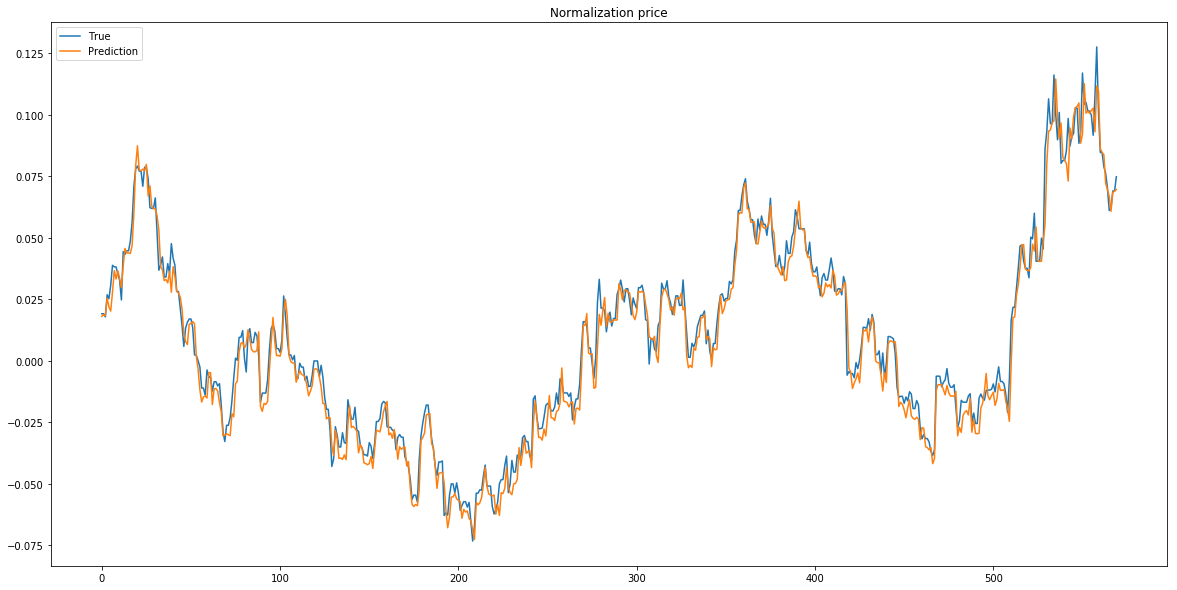


 -0.0025345246714896727 

Train Score:  0.00010577292138182266
Test Score:  3.853576286418135e-05


In [0]:
prediction(model)

Train Score:  5.96175356711711e-06


Test Score:  2.1156647403187346e-06


# 10 일 기준

In [0]:
seq_len = 20
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape    

((5156, 20, 1), (573, 20, 1))

In [0]:
model = Sequential()


model.add(layers.Conv1D(50, 5, activation='relu',input_shape=(20, 1)))
model.add(layers.Conv1D(50, 5, activation='relu'))
model.add(layers.Conv1D(50, 5, activation='relu'))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_37 (Conv1D)           (None, 16, 50)            300       
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 12, 50)            12550     
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 8, 50)             12550     
_________________________________________________________________
lstm_11 (LSTM)               (None, 8, 50)             20200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 106,101
Trainable params: 106,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

W0817 05:33:32.072486 140189404530560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0817 05:33:33.291712 140189404530560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0817 05:33:33.298228 140189404530560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 5156 samples, validate on 573 samples
Epoch 1/20
5156/5156 [==============================] - 24s 5ms/step - loss: 4.3396e-04 - val_loss: 3.8464e-05
Epoch 2/20
5156/5156 [==============================] - 16s 3ms/step - loss: 1.6710e-04 - val_loss: 8.4084e-05
Epoch 3/20
5156/5156 [==============================] - 16s 3ms/step - loss: 1.5060e-04 - val_loss: 5.0200e-05
Epoch 4/20
5156/5156 [==============================] - 16s 3ms/step - loss: 1.4363e-04 - val_loss: 5.1736e-05
Epoch 5/20
5156/5156 [==============================] - 15s 3ms/step - loss: 1.3971e-04 - val_loss: 5.0227e-05
Epoch 6/20
5156/5156 [==============================] - 16s 3ms/step - loss: 1.3284e-04 - val_loss: 4.2758e-05
Epoch 7/20
5156/5156 [==============================] - 15s 3ms/step - loss: 1.3082e-04 - val_loss: 5.5189e-05
Epoch 8/20
5156/5156 [==============================] - 16s 3ms/step - loss: 1.2854e-04 - val_loss: 3.2355e-05
Epoch 9/20
5156/5156 [==============================] - 15s 3ms/s

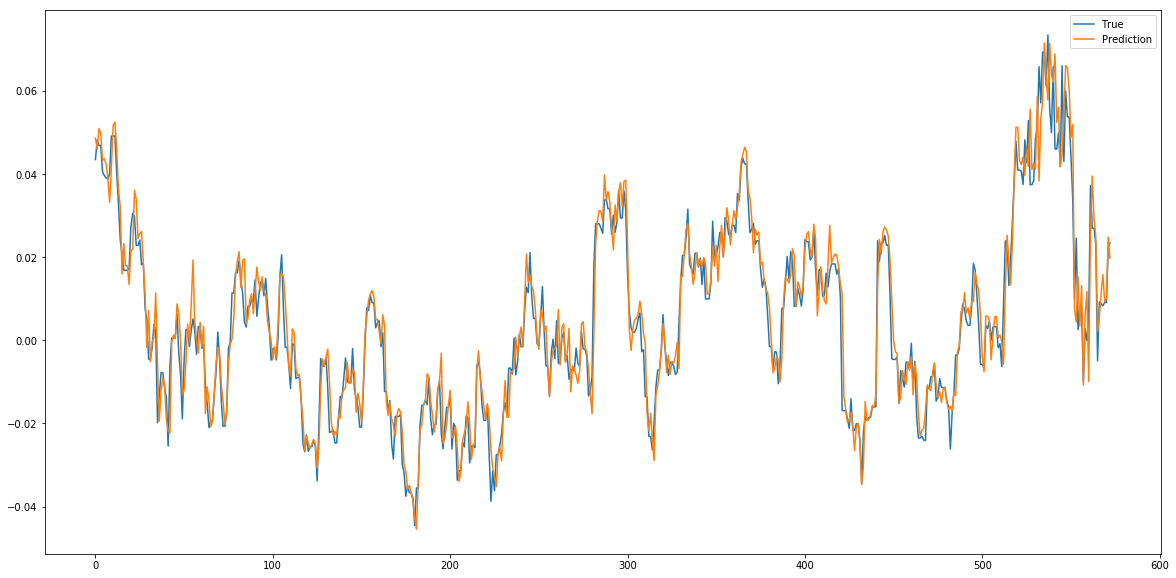

In [0]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [0]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  9.753315673653894e-05
Test Score:  3.238711562507459e-05
